به نام خدا
# بررسی قضیه‌ی ویریال در مسئله‌ی سه جرم

علیرضا حبیب زاده

شماره دانشجویی:
`99109393`

پروژه‌ی درس مکانیک تحلیلی ۲ - بهار ۱۴۰۲

دکتر بهمن‌آبادی

---

قضیه‌ی ویریال در مکانیک تحلیلی میانگین انرژی جنبشی سیستمی از ذرات گسسته را به انرژی پتانسیل آن‌ها مربوط می‌کند. به بیان ریاضی:
$$ \langle T \rangle =-{\frac {1}{2}}\,\sum _{k=1}^{N}{\bigl \langle }\mathbf {F} _{k}\cdot \mathbf {r} _{k}{\bigr \rangle} $$

برای زمانی که انرژی پتانسیل ذرات به فرم

$$ V(r) = α r^n $$

باشد، قضیه به این فرم در می‌آید:

$$ 2\langle T\rangle =n\langle V_{\text{TOT}}\rangle $$

برای سیستم‌هایی که تنها تحت پتانسیل گرانشی یکدیگر هستند متوسط انرژی جنبشی کل برابر با نصف منفی متوسط کل انرژی پتانسیل می‌شود.

بررسی صحت این قضیه برای سیستمی با دو جرم کار ساده‌ای است.
چرا که مسئله‌ی دو جرم گرانشی در هر شرایط اولیه و فرمی که باشد به صورت تحلیلی قابل بررسی است.
با داشتن مختصات هر کدام از ذرات تابع زمان و انتگرال‌گیری می‌توان صحت قضیه را بررسی کرد.

اما زمانی که سه جرم گرانشی با هم در فضای آزاد برهمکنش کنند حل تحلیلی سیستم قابل انجام نیست.

می‌خواهیم این سیستم را شبیه‌سازی کنیم و طول زمان صحت قضیه‌ی ویریال را بسنجیم.

در تمام این پروژه برای راحتی مکان اولیه‌ی ذرات و سرعت‌هایشان را داخل یک صفحه در نظر می‌گیریم. برخلاف مسئله‌ی دو جرم مسئله‌ی سه جرم را نمی‌توان در صفحه بررسی کرد و این فرض تنها برای راحتی کار و راحتی نمایش مسئله انجام شده است.

## پیاده‌سازی

وارد کردن کتابخانه‌ها و ثابت گرانش

In [217]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67430e-11  # gravitational constant

تابعی تعریف می‌کنیم تا بتوان با آن نیروی بین دو ذره ره به صورت بردار حساب کرد

In [218]:
def calculate_force(mass1, mass2, position1, position2):
    distance = np.linalg.norm(position1 - position2)
    force = G * mass1 * mass2 / distance**2
    direction = (position2 - position1) / distance
    return force * direction

تابعی برای شبیه‌سازی سیستم سه ذره‌ای تعریف می‌کنیم. کافی است مکان ذرات را در پله‌ی زمانی بعدی بر اساس سرعت و شتاب آن‌ها
(شتاب برای دقت بیشتر)
حساب کنیم.
شتاب هر لحظه نیز از روی نیروها که از روی مکان فعلی بدست آمده حساب می‌کنیم.

دقت کنید که این تابع کلی است و محدود به نیروی گرانشی نمی‌شود.

In [219]:
def simulate_three_body_system(masses, initial_positions, initial_velocities, num_steps, time_step):
    positions = np.zeros((num_steps, 3, 2))
    velocities = np.zeros((num_steps, 3, 2))
    positions[0] = initial_positions
    velocities[0] = initial_velocities

    for step in range(1, num_steps):
        forces = np.zeros((3, 2))
        for i in range(3):
            for j in range(i + 1, 3):
                force = calculate_force(masses[i], masses[j], positions[step-1, i], positions[step-1, j])
                forces[i] += force
                forces[j] -= force

        accelerations = forces / masses[:, np.newaxis]

        positions[step] = positions[step-1] + velocities[step-1] * time_step + 0.5 * accelerations * time_step**2
        velocities[step] = velocities[step-1] + accelerations * time_step

    return positions, velocities

### پارامترها
در این قسمت پارامترهای ثابت مسئله را تعریف و تعیین می‌کنیم.

In [220]:
# Parameters
masses = np.array([100000000, 150000000, 120000000])
initial_positions = np.array([[0, 0], [1, 0], [0.5, 1]])
initial_velocities = np.array([[0, 0.1], [-0.1, 0], [0.1, -0.05]])
num_steps = 20000
time_step = 0.01

### اجرای شبیه‌سازی
شبیه سازی را اجرا می‌کنیم. بسته به دقت و مدت شبیه‌سازی ممکن است این سلول کمی طول بکشد.

In [221]:
# Run simulation
positions, velocities = simulate_three_body_system(masses, initial_positions, initial_velocities, num_steps, time_step)

### نمایش شبیه‌سازی
در این قسمت آن چه که از شبیه‌سازی به دست آوردیم را تحلیل کرده و نمایش می‌دهیم.

In [222]:
time = np.arange(0, num_steps * time_step, time_step)

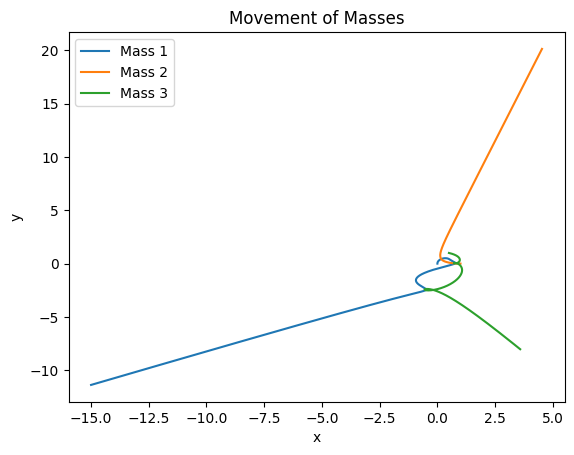

In [223]:
# Plot positions
plt.figure()
labels = ['Mass 1', 'Mass 2', 'Mass 3']
for i in range(3):
    plt.plot(positions[:, i, 0], positions[:, i, 1], label=labels[i])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Movement of Masses')
plt.legend()
plt.show()

در این قسمت انرژی جنبشی و پتانسیل ذرات و میانگین آن‌ها تا آن لحظه را در هر لحظه بر اساس داده‌هایی که از شبیه‌سازی به دست آمده حساب می‌کنیم.

In [224]:
# Calculate energies
potential_energies = np.zeros(num_steps)
kinetic_energies = np.zeros(num_steps)
cumulative_potential_energies = np.zeros(num_steps)
cumulative_kinetic_energies = np.zeros(num_steps)

for step in range(num_steps):
    for i in range(3):
        for j in range(i + 1, 3):
            distance = np.linalg.norm(positions[step, i] - positions[step, j])
            potential_energies[step] -= G * masses[i] * masses[j] / distance

    for i in range(3):
        kinetic_energies[step] += 0.5 * masses[i] * np.linalg.norm(velocities[step, i])**2

    cumulative_potential_energies[step] = np.mean(potential_energies[:step+1])
    cumulative_kinetic_energies[step] = np.mean(kinetic_energies[:step+1])

انرژی جنبشی و پتانسیل ذرات را بر حسب زمان رسم می‌کنیم.
این نمودار ربطی به قضیه‌ی ویریال نداد و تنها برای شهود به مسئله رسم شده است.

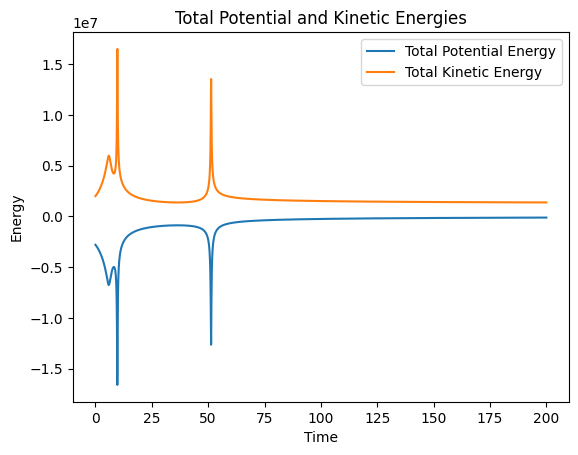

In [225]:
# Plot energies
plt.figure()
plt.plot(time, potential_energies, label='Total Potential Energy')
plt.plot(time, kinetic_energies, label='Total Kinetic Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Total Potential and Kinetic Energies')
plt.legend()
plt.show()

میانگین تجمعی (میانگین تا آن لحظه)
برای هر دو انرژی جنبشی و پتانسیل ذرات رسم می‌کنیم.
این نموداری است که در آن نسبت دو مقدار در نهایت باید به مقداری که قضیه‌ی ویریال می‌گوید میل کند.

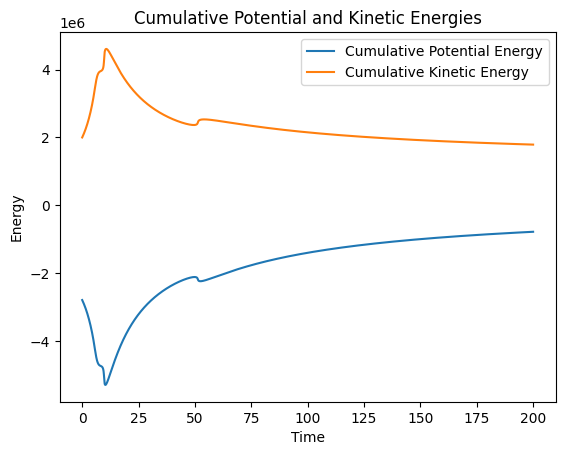

In [226]:
# Plot cumulative energies
plt.figure()
plt.plot(time, cumulative_potential_energies, label='Cumulative Potential Energy')
plt.plot(time, cumulative_kinetic_energies, label='Cumulative Kinetic Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Cumulative Potential and Kinetic Energies')
plt.legend()
plt.show()

همان طور که دیدیم نسبت کمیت‌ها در نمودار به مقدار ثابتی میل می‌کرد.
این مقدار ثابت را حساب می‌کنیم:

In [227]:
print(cumulative_potential_energies[-1] / cumulative_kinetic_energies[-1])

-0.43599567777216436


که تا حد خوبی مطابق پیشبینی قضیه‌ی ویریال (-0.5) است.